## GS건설
=> 정권 교체시기와 맞물리면서 부동산 시장 안정화를 위해 노력

=> 재건축, 재건설이 하는 곳이 늘어나면서 건설사 주식 오를것으로 예상

In [1]:
import pandas as pd
import os
import sys
import urllib.request
import json
import re

In [2]:
def clean_html(x):
  #https://predictor-ver1.tistory.com/4
  x = re.sub("\&\w*\;","",x)
  x = re.sub("<.*?>","",x)
  return x

In [3]:
client_id = "kSvhHjtuoPUSNJqUXXYP" #발급받은 ID 입력
client_secret = "kqKwNDyR6o" #발급받은 PW 입력
encText = urllib.parse.quote("gs건설") # 검색할 단어 입력

start =1
display = 100
url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&start=" + str(start) + "&display=" + str(display) # json 결과
#url = "https://openapi.naver.com/v1/search/news.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    result = response_body.decode('utf-8')
    #print(result)
else:
    print("Error Code:" + rescode)

In [4]:
result_json = json.loads(result)

In [5]:
df_json = pd.DataFrame(result_json["items"])

In [6]:
df_json['title'] = df_json['title'].apply(lambda x: clean_html(x))
df_json['description'] = df_json['description'].apply(lambda x: clean_html(x))

In [7]:
df_json.head()

,title,originallink,link,description,pubDate
0,출혈 경쟁 피하자…달라진 정비사업 전략,https://www.ebn.co.kr/news/view/1526024/?sc=Naver,https://www.ebn.co.kr/news/view/1526024/?sc=Naver,6일 업계에 따르면 현재 도시정비사업 실적 1위인 GS건설(1조8919억원)은 80...,"Wed, 06 Apr 2022 14:00:00 +0900"
1,"1분기 총수 주식재산, 이재용 부회장 부동의 1위…주식가치는 3개월 새 1조원...",http://www.dt.co.kr/contents.html?article_no=2...,https://news.naver.com/main/read.naver?mode=LS...,"허창수 회장은 GS와 GS건설 두 곳에서 주식을 갖고 있는데, 두 종목 모두 최근 ...","Wed, 06 Apr 2022 13:47:00 +0900"
2,중동서 건설수주 작년의 10% 그쳐,http://www.smedaily.co.kr/news/articleView.htm...,http://www.smedaily.co.kr/news/articleView.htm...,"GS건설은 방글라데시에서 8621억원 규모의 배선전로사업을, 삼성물산이 베트남에서 ...","Wed, 06 Apr 2022 13:44:00 +0900"
3,"신성이엔지, 에퀴스와 3.3MW 규모 태양광 발전소 건설 계약",http://www.digitaltoday.co.kr/news/articleView...,http://www.digitaltoday.co.kr/news/articleView...,"최근 GS건설과 지붕형 태양광 발전소 설치 계약을 체결했고, 부산에 위치한 산업단지...","Wed, 06 Apr 2022 13:38:00 +0900"
4,"자이SD, ‘신설동역자이르네’ 4월 분양",http://www.sentv.co.kr/news/view/616207,http://www.sentv.co.kr/news/view/616207,GS건설의 자회사인 자이SD는 주거복합시설 ‘신설동역자이르네’를 4월 분양할 예정이...,"Wed, 06 Apr 2022 13:32:00 +0900"


In [8]:
# 제목 추출
all_title = df_json['title']

all_title  # 출력하여 내용 확인

0                                출혈 경쟁 피하자…달라진 정비사업 전략
1       1분기 총수 주식재산, 이재용 부회장 부동의 1위…주식가치는 3개월 새 1조원...
2                                  중동서 건설수주 작년의 10% 그쳐
3                   신성이엔지, 에퀴스와 3.3MW 규모 태양광 발전소 건설 계약
4                               자이SD, ‘신설동역자이르네’ 4월 분양
                            ...                       
95                             GS건설, 우려 대비 견조할 이익-이베스트
96                                     오늘의 증시 리포트(4/5)
97    GS건설, 추가상승 여지 있어… 연간 영업이익 29.5% 상승 전망 [이베스트투자...
98                   GS건설, 주택 매출 성장 시동…1분기 견조한 실적-이베스트
99                    GS건설·DL이앤씨, 호주 공략 강화…수주 확대로 이어지나
Name: title, Length: 100, dtype: object

In [9]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [10]:
import nltk
nltk.download('all')  # Natural Language ToolKit 모든 패키지 설치

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [11]:
!pip install wordcloud  # 워드클라우드 설치

In [12]:
import os
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

from wordcloud import WordCloud, STOPWORDS

import matplotlib
import matplotlib.pyplot as plt

In [13]:
# stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [14]:
import re

def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
  return text_rmv

In [15]:
words = []
for title in all_title:
    title = clean_text(title)
    words.append(title.split())

In [16]:
print(words)

[['출혈', '경쟁', '피하자', '달라진', '정비사업', '전략'], ['1분기', '총수', '주식재산', '이재용', '부회장', '부동의', '1위', '주식가치는', '3개월', '새', '1조원'], ['중동서', '건설수주', '작년의', '10%', '그쳐'], ['신성이엔지', '에퀴스와', '3', '3MW', '규모', '태양광', '발전소', '건설', '계약'], ['자이SD', '신설동역자이르네', '4월', '분양'], ['1분기', '대기업', '총수', '주식재산', '5조', '증발', '정몽규', '회장', '29%', '하락'], ['자이SD', '동대문구', '신설동역자이르네', '이달', '분양예정'], ['신성이엔지', '전남', '신안', '3', '3MW', '태양광', '발전소', '건설', '계약', '체결'], ['국내', '33개', '그룹', '총수', '주식', '5조원', '줄어', '3개월', '새', '7', '5%', '하락'], ['1분기', '총수', '주식재산', '이재용', '부회장', '1위', '정몽규', '회장', '주식재산', '28%↓'], ['신성이엔지', '전남', '신안에', '태양광발전소', '건설', '에퀴스와', '계약'], ['오늘Who', '현대건설', '디에이치', '전략', '에', '변수', '윤영준', '부산입찰', '고민'], ['정광식', '호', '대보건설', '올해', '도시정비사업', '강화', '드라이브'], ['신성이엔지', '3', '3MW', '규모', '태양광발전소', '건설', '및', 'OM', '계약', '체결'], ['자이SD', '동대문구', '신설동역자이르네', '238가구', '이달', '분양'], ['통신업계', '로봇', '플랫폼', '사업', '경쟁', '본격화'], ['신성이엔지', '태양광', '건설', '사업', '확대', '전남', '신안서', '에퀴스', '와', '손잡아'], ['한강변', '르네상스', '부활

In [17]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  # 작업 내용 확인

['출혈', '경쟁', '피하자', '달라진', '정비사업', '전략', '1분기', '총수', '주식재산', '이재용', '부회장', '부동의', '1위', '주식가치는', '3개월', '새', '1조원', '중동서', '건설수주', '작년의', '10%', '그쳐', '신성이엔지', '에퀴스와', '3', '3MW', '규모', '태양광', '발전소', '건설', '계약', '자이SD', '신설동역자이르네', '4월', '분양', '1분기', '대기업', '총수', '주식재산', '5조', '증발', '정몽규', '회장', '29%', '하락', '자이SD', '동대문구', '신설동역자이르네', '이달', '분양예정', '신성이엔지', '전남', '신안', '3', '3MW', '태양광', '발전소', '건설', '계약', '체결', '국내', '33개', '그룹', '총수', '주식', '5조원', '줄어', '3개월', '새', '7', '5%', '하락', '1분기', '총수', '주식재산', '이재용', '부회장', '1위', '정몽규', '회장', '주식재산', '28%↓', '신성이엔지', '전남', '신안에', '태양광발전소', '건설', '에퀴스와', '계약', '오늘Who', '현대건설', '디에이치', '전략', '에', '변수', '윤영준', '부산입찰', '고민', '정광식', '호', '대보건설', '올해', '도시정비사업', '강화', '드라이브', '신성이엔지', '3', '3MW', '규모', '태양광발전소', '건설', '및', 'OM', '계약', '체결', '자이SD', '동대문구', '신설동역자이르네', '238가구', '이달', '분양', '통신업계', '로봇', '플랫폼', '사업', '경쟁', '본격화', '신성이엔지', '태양광', '건설', '사업', '확대', '전남', '신안서', '에퀴스', '와', '손잡아', '한강변', '르네상스', '부활', '성수', '한남', '재개발', '50층', '기대', 

In [18]:
count = Counter(words2)

count  # 출력하여 내용 확인

Counter({'10%': 1,
         '10조': 1,
         '13': 1,
         '18%': 1,
         '1군': 1,
         '1분기': 7,
         '1순위': 1,
         '1위': 5,
         '1조': 2,
         '1조원': 1,
         '1지방선거': 1,
         '2': 1,
         '22년째': 1,
         '238가구': 7,
         '27%': 1,
         '28%': 2,
         '28%↓': 2,
         '29': 1,
         '29%': 1,
         '2단계': 2,
         '3': 6,
         '33개': 1,
         '3MW': 3,
         '3MW급': 2,
         '3㎹': 1,
         '3개월': 2,
         '3개월새': 1,
         '4': 1,
         '43%': 1,
         '4월': 8,
         '5': 1,
         '5%': 2,
         '50층': 1,
         '54개월': 2,
         '5만5000원': 1,
         '5위': 1,
         '5조': 2,
         '5조원': 1,
         '6': 1,
         '6000억': 1,
         '6만전자': 1,
         '7': 1,
         '713가구': 1,
         '8000여': 2,
         '8900가구': 1,
         '8천': 1,
         'AI': 2,
         'BIFCⅡ': 1,
         'DL이앤씨': 1,
         'DMZ의': 1,
         'GS': 1,
         'GS건설': 12,
       

In [19]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

신성이엔지 : 13
건설 : 13
분양 : 13
신설동역자이르네 : 12
GS건설 : 12
자이SD : 11
태양광 : 9
계약 : 9
4월 : 8
동대문구 : 8
1분기 : 7
주식재산 : 7
발전소 : 7
238가구 : 7
공급 : 7
재건축 : 7
체결 : 6
청약 : 6
총수 : 5
1위 : 5
정몽규 : 5
건설사 : 5
경쟁 : 4
이달 : 4
전남 : 4
태양광발전소 : 4
연이은 : 4
수주 : 4
전국구 : 4
실적 : 4
브랜드 : 4
제천 : 4
자이 : 4
이재용 : 3
에퀴스와 : 3
3MW : 3
증발 : 3
회장 : 3
하락 : 3
그룹 : 3
주식 : 3
사업 : 3
삼성물산 : 3
지역 : 3
울타리 : 3
청약지 : 3
막바지 : 3


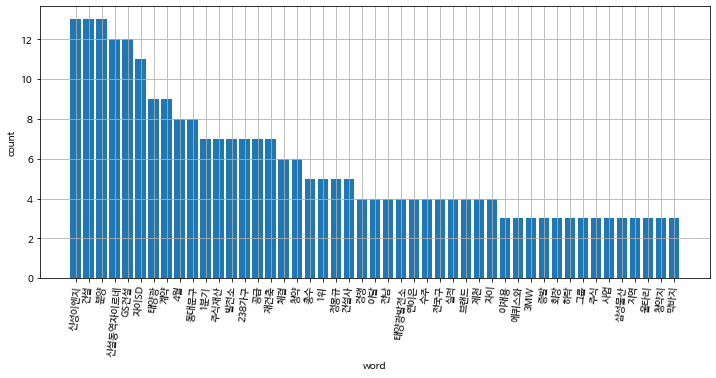

In [20]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

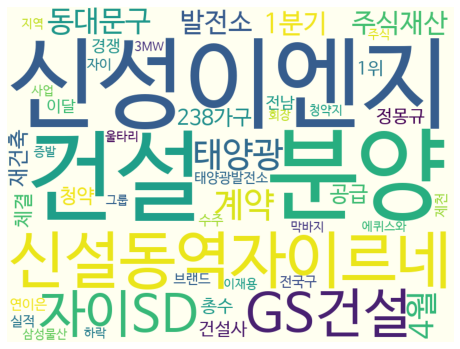

In [21]:
wc=WordCloud(background_color='ivory', font_path = font_path, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [22]:
gs = pd.read_csv("/content/sample_data/home_price.csv")

In [23]:
gs

,Date,AVG,Rebuild,Redevelop,Stamp
0,2022-01-09,42470.0,84,68,59
1,2022-01-16,43910.0,78,67,55
2,2022-01-23,40990.0,77,68,66
3,2022-01-30,38810.0,71,60,51
4,2022-02-06,39950.0,82,64,61
5,2022-02-13,39830.0,80,69,69
6,2022-02-20,38970.0,57,70,83
7,2022-02-27,41410.0,68,72,40
8,2022-03-06,43712.5,81,52,53
9,2022-03-13,45187.5,91,80,59


In [24]:
gs['AVG']

0     42470.0
1     43910.0
2     40990.0
3     38810.0
4     39950.0
5     39830.0
6     38970.0
7     41410.0
8     43712.5
9     45187.5
10    47050.0
11    46810.0
Name: AVG, dtype: float64

In [25]:
import numpy as np
np.corrcoef(gs['AVG'], gs['Rebuild'])[0,1]

0.5807407661154697

In [26]:
import numpy as np
np.corrcoef(gs['AVG'], gs['Redevelop'])[0,1]

0.3386958836221559

In [27]:
import numpy as np
np.corrcoef(gs['AVG'], gs['Stamp'])[0,1]

-0.025376622191692046